# Box Plot

## Matplotlib

In [3]:
# Python program to show pyplot module
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
 
# Reading the CSV file to plot a box chart
iris = pd.read_csv("../data/Iris.csv")
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


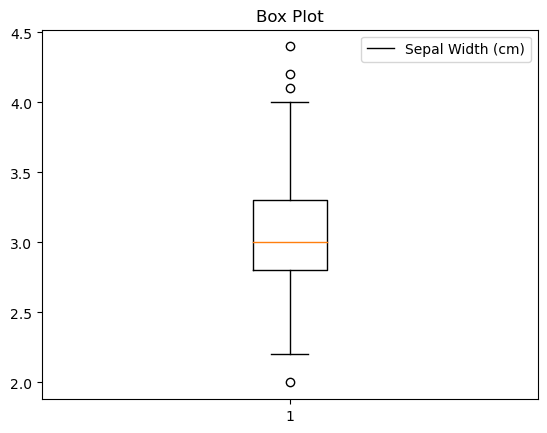

In [4]:
plt.boxplot(iris["sepalwidth"])
 
# Title to the plot
plt.title("Box Plot")
 
# Adding the legends
plt.legend(["Sepal Width (cm)"])
plt.show()

## Seaborn

In [8]:
import seaborn as sns

In [6]:
# Reading the CSV file to plot box chart using Seaborn
amazon = pd.read_csv("../data/amazon.csv")
amazon

,id,product_name,brand,categories,manufacturer,rating,username
0,AVqkIhwDv8e3D1O-lebb,All,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,1.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,All,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,1.0,truman
2,AVqkIhwDv8e3D1O-lebb,All,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,5.0,DaveZ
3,AVqkIhwDv8e3D1O-lebb,All,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,4.0,Shacks
4,AVqkIhwDv8e3D1O-lebb,All,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,5.0,explore42
...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",3.0,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",1.0,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",1.0,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",1.0,Just the Buyer


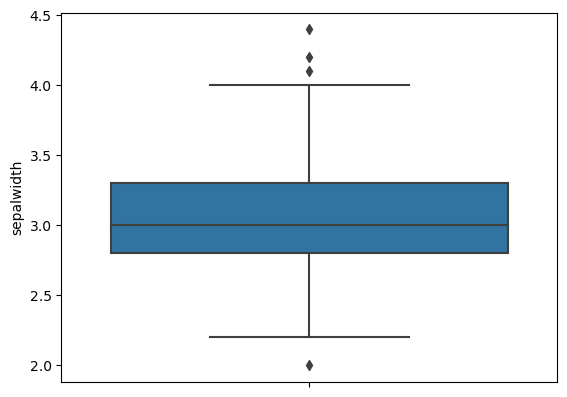

In [9]:
sns.boxplot(y="sepalwidth", data=iris)
plt.show()

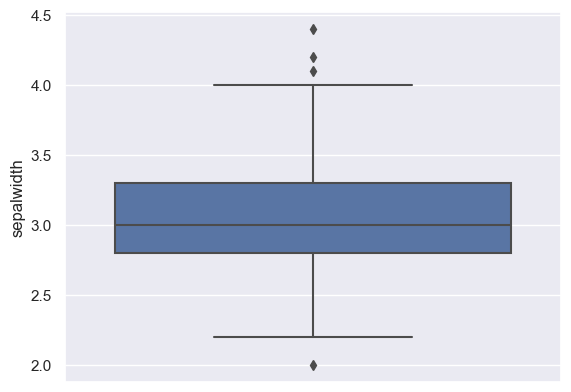

In [18]:
sns.boxplot(y=iris["sepalwidth"])
plt.show()

### Several numerical variables

In [ ]:
# If you intend to add more information in a single figure,
# you can also visualize several numerical variables distributions 
# by setting the data argument and specifying a dataset with several numerical columns.

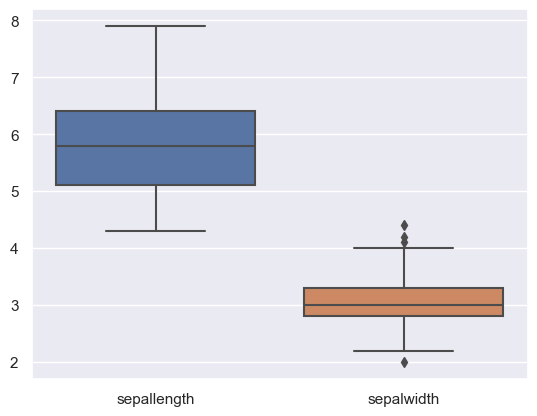

In [20]:
sns.boxplot(data=iris.loc[:, ['sepallength', 'sepalwidth']])
plt.show()

### One numerical variable and several groups

In [ ]:
# To get a better understanding of the distribution of a given variable between two or more groups,
# specify the 'x' parameter in the boxplot() function.

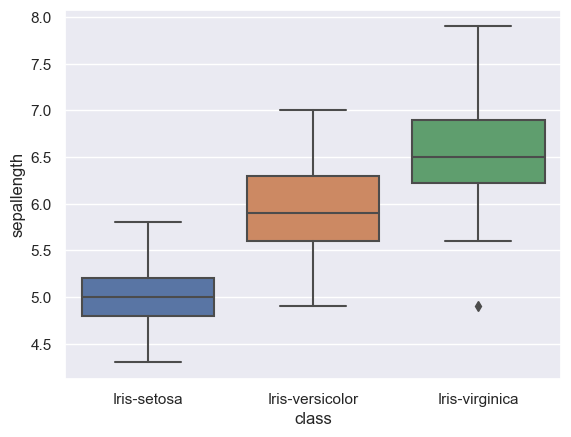

In [24]:
sns.boxplot(x=iris["class"], y=iris["sepallength"])
plt.show()

#### Task 1:
Plot the box plot using either Matplotlib or Seaborn for all the columns "sepallength","sepalwidth","petallength" and "petalwidth"

Double-click <b>here</b> for the solution.

<!-- Soltuion is below:


# Solution:

data= iris.iloc[:,0:4].values # read the values of the first 4 columns

# show plot
fig = plt.figure(figsize =(20, 14))
plt.boxplot(data)
plt.show()

-->

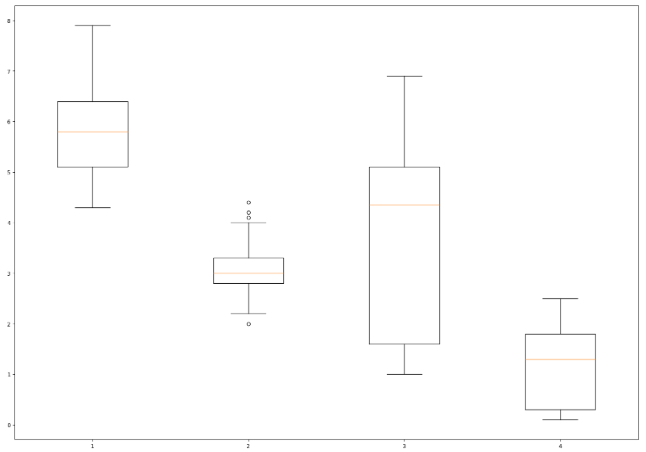

## Removing Outliers

#### Method 1: Using threshold

In [20]:
# Removing outliers
min_threshold, max_threshold = iris['sepalwidth'].quantile([0.02, 0.98]) # 0.02, 0.98 = 1x100 -100
min_threshold, max_threshold

(2.2, 4.002000000000001)

In [21]:
clean_iris = iris[(iris['sepalwidth'] < max_threshold) & (iris['sepalwidth'] > min_threshold)]

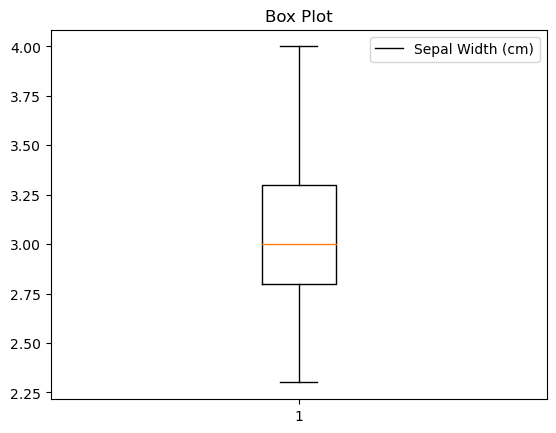

In [22]:
plt.boxplot(clean_iris["sepalwidth"])
 
# Title to the plot
plt.title("Box Plot")
 
# Adding the legends
plt.legend(["Sepal Width (cm)"])
plt.show()

#### Method 2: Using IRQ

In [36]:
# v_name = df["col_name"]  .quantile(0.25)
q1 = iris['sepalwidth'].quantile(0.25)
q3 = iris['sepalwidth'].quantile(0.75)

IQR = q3 - q1
IQR

# Same code written

other_method = iris[~((iris['sepalwidth'] < (q1 - 1.5 * IQR)) | (iris['sepalwidth'] > (q3 + 1.5 * IQR)))]

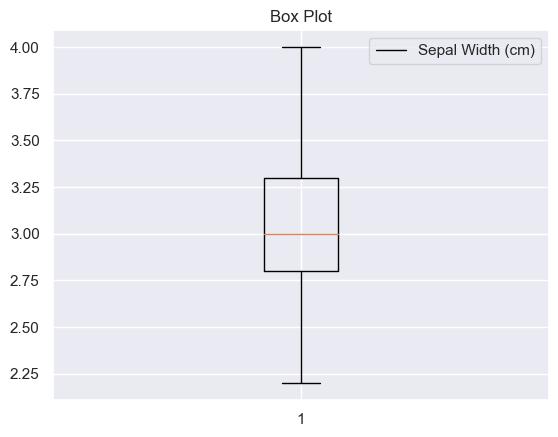

In [37]:
plt.boxplot(other_method["sepalwidth"])
 
# Title to the plot
plt.title("Box Plot")
 
# Adding the legends
plt.legend(["Sepal Width (cm)"])
plt.show()

#### Task 2:
Remove the outlier from sepal length for class "Iris-virginica". Identify which method best removes the data.

Double-click <b>here</b> for the solution.

<!-- Soltuion is below:


# Solution:
virginica = iris[iris["class"] == "Iris-virginica"]

## Method 1: Using Threshold:
min_threshold, max_threshold = virginica['sepallength'].quantile([0.003, 0.97])
min_threshold, max_threshold

clean_iris2 = virginica[(virginica['sepallength'] < max_threshold) & (virginica['sepallength'] > min_threshold)]

plt.boxplot(clean_iris2["sepallength"])
# Title to the plot
plt.title("Box Plot")
# Adding the legends
plt.legend(["Sepal Length (cm)"])
plt.show()


# or:
# Method 2: Using IQR:
# This method have not removed the outliers
q1 = virginica['sepallength'].quantile(0.25)
q3 = virginica['sepallength'].quantile(0.75)

IQR = q3 - q1
IQR

other_method2 = virginica[~((virginica['sepallength'] < (q1 - 1.5 * IQR)) | (virginica['sepallength'] > (q3 + 1.5 * IQR)))]

plt.boxplot(other_method2["sepallength"])
# Title to the plot
plt.title("Box Plot")
# Adding the legends
plt.legend(["Sepal Length (cm)"])
plt.show()

-->